In [1]:
import pandas as pd

In [31]:
%matplotlib inline

In [24]:
uni = pd.read_excel('results_20181021.xls', index_col='Identifier')
uni = uni.replace('-',pd.np.nan)
print(uni.shape)

(2633, 12)


In [25]:
uni.head()

,Name,Primary FactSet RBICS Economy,Primary FactSet RBICS Sector,Primary FactSet RBICS Industry Group,Primary NAICS Sector,Primary NAICS Industry Group,Primary NAICS US Industry,Market Cap,EBIT,Enterprise Value,Return on Average Invested Capital,Sales Per Employee
Identifier,,,,,,,,,,,,
EEIG-US,"024 Pharma, Inc.",Healthcare,Healthcare Services,Nutritional Health Pharmaceuticals,Manufacturing,Pharmaceutical and Medicine Manufacturing,Medicinal and Botanical Manufacturing,3325.49780,-0.00298,3884.16800,-0.923683,NaN
FLWS-US,"1-800-FLOWERS.COM, Inc.",Consumer Cyclicals,Consumer Retail,Entertainment Retail,Retail Trade,Florists,Florists,695.26886,41.04800,795.16190,10.316558,0.240736
XXII-US,"22nd Century Group, Inc.",Consumer Non-Cyclicals,Food and Tobacco Production,Cigarette Manufacturing,"Professional, Scientific, and Technical Services",Scientific Research and Development Services,Research and Development in Biotechnology (exc...,358.20000,-13.29986,220.61682,-26.120778,0.210130
TWOU-US,"2U, Inc.",Business Services,Business Services,Administrative Services,Information,Software Publishers,Software Publishers,3646.48750,-30.13800,2941.65900,-10.092459,0.149195
DDD-US,3D Systems Corporation,Industrials,Industrial Manufacturing,Factory Automation Equipment,Manufacturing,Printing and Related Support Activities,Commercial Printing (except Screen and Books),1894.03830,-53.97300,841.17053,-10.478300,0.242336


In [71]:
uni['Market Cap ($MM)'] = uni['Market Cap']/10
uni['Market Cap ($MM)'].describe() # in $MM

count      2633.000000
mean        926.942008
std        4315.257821
min          10.015720
25%          39.824200
50%         128.810110
75%         443.168400
max      105925.200000
Name: Market Cap ($MM), dtype: float64

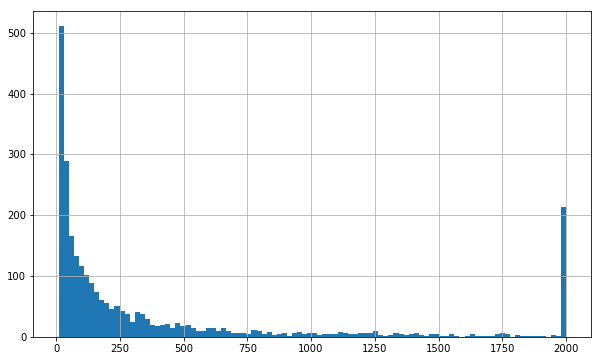

In [72]:
(uni['Market Cap ($MM)'].clip(upper=2000)).hist(bins=100, figsize=(10,6));

In [26]:
uni['Earnings Yield'] = uni['EBIT'] / uni['Enterprise Value']

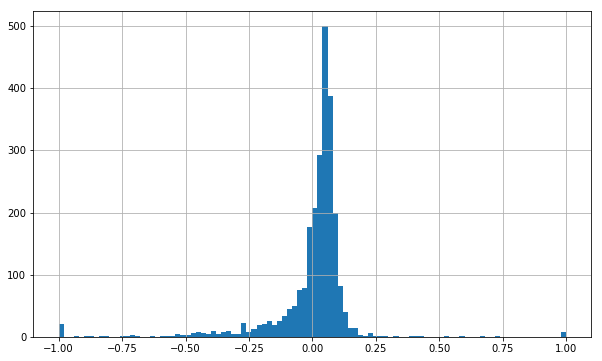

In [53]:
(uni['Earnings Yield'].clip(-1,1)).hist(bins=100, figsize=(10,6));

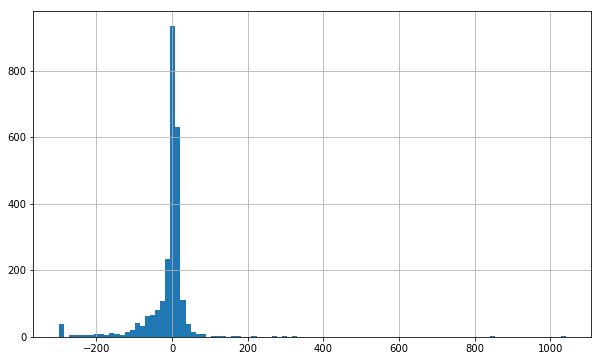

In [58]:
(uni['Return on Average Invested Capital'].clip(-300)).hist(bins=100,figsize=(10,6));

In [65]:
# scan logic
uni['Quality Rank'] = uni['Earnings Yield'].rank(ascending=False)
uni['RoC Rank'] = uni['Return on Average Invested Capital'].rank(ascending=False)

uni['Composite Rank'] = uni['Quality Rank'] + uni['RoC Rank']

_rank_cols = ['Quality Rank','RoC Rank','Composite Rank']

In [80]:
uni.loc[(uni['Primary FactSet RBICS Sector']=='Software and Consulting') & \
        (~uni['Primary FactSet RBICS Industry Group'].str.contains('Consulting')) & \
        (uni['Market Cap ($MM)']>50),
        _rank_cols + ['Market Cap ($MM)', 'Primary FactSet RBICS Industry Group']]\
   .sort_values(_rank_cols[-1])

,Quality Rank,RoC Rank,Composite Rank,Market Cap ($MM),Primary FactSet RBICS Industry Group
Identifier,,,,,
ABCD-US,283.0,5.0,288.0,68.112000,Consumer Data and Services
IDCC-US,47.0,330.0,377.0,250.291100,IT Infrastructure Software
SPGI-US,748.0,71.0,819.0,4736.751000,Professional Data and Services
MANH-US,857.0,24.0,881.0,314.727370,Enterprise Management Software
CHKP-US,823.0,177.0,1000.0,1722.571900,IT Infrastructure Software
VRSN-US,1047.0,8.0,1055.0,1723.812700,Internet Support Services
CA-US,314.0,1080.0,1394.0,1838.257800,IT Infrastructure Software
FB-US,1235.0,164.0,1399.0,44515.522000,Web-Based Data and Services
FDS-US,1284.0,161.0,1445.0,842.648500,Professional Data and Services


## Profile

In [8]:
uni.groupby(['Primary FactSet RBICS Economy','Primary FactSet RBICS Sector']).size()

Primary FactSet RBICS Economy  Primary FactSet RBICS Sector                     
Business Services              Business Services                                    123
Consumer Cyclicals             Consumer Goods                                        61
                               Consumer Retail                                       74
                               Consumer Vehicles and Parts                           38
                               Miscellaneous Retail                                  41
Consumer Non-Cyclicals         Food and Staples Retail                               60
                               Food and Tobacco Production                           86
                               Household Products                                    38
                               Household Services                                    25
Consumer Services              Hospitality Services                                 116
                               Media an

In [10]:
uni.shape

(2633, 12)

In [11]:
tech = uni[uni['Primary FactSet RBICS Economy']=='Technology']